In [1]:
import numpy as np
import pandas as pd

In [2]:
data =pd.read_csv("/content/claim_data.csv")
data

,Claim ID,Provider ID,Patient ID,Date of Service,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome
0,0HO1FSN4AP,126528997,7936697103,08/07/2024,304,99231,A02.1,218,203,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid
1,9U86CI2P5A,6986719948,1547160031,06/21/2024,348,99213,A16.5,216,206,Medicare,Paid,Pre-existing condition,Yes,Open,Denied
2,1QEU1AIDAU,1355108115,2611585318,07/04/2024,235,99213,A00.1,148,119,Commercial,Under Review,Duplicate claim,No,Denied,Denied
3,WH7XDS8CEO,9991055906,7167948632,05/26/2024,112,99215,A18.6,79,69,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied
4,M6OJEZ8KGI,7382167012,2140226267,07/16/2024,406,99238,A17.9,320,259,Medicare,Denied,Authorization not obtained,No,On Hold,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0B0TP89BQF,7640195037,6836887959,05/30/2024,307,99238,A08.8,231,213,Commercial,Paid,Service not covered,No,Pending,Partially Paid
996,VVROAPZFFA,3378390045,8592277150,06/23/2024,150,99215,A02.8,105,99,Medicare,Paid,Lack of medical necessity,Yes,Closed,Partially Paid
997,Q9J55DIMLR,2766789913,9757787667,07/07/2024,128,99213,A02.2,83,75,Medicare,Paid,Authorization not obtained,Yes,Partially Paid,Paid
998,531HVTDM18,1335890669,1995402912,05/14/2024,178,99215,A08.2,122,103,Medicaid,Under Review,Patient eligibility issues,Yes,On Hold,Denied


In [3]:
print(data.shape)
data.head()

(1000, 15)


,Claim ID,Provider ID,Patient ID,Date of Service,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome
0,0HO1FSN4AP,126528997,7936697103,08/07/2024,304,99231,A02.1,218,203,Self-Pay,Paid,Incorrect billing information,Yes,Pending,Partially Paid
1,9U86CI2P5A,6986719948,1547160031,06/21/2024,348,99213,A16.5,216,206,Medicare,Paid,Pre-existing condition,Yes,Open,Denied
2,1QEU1AIDAU,1355108115,2611585318,07/04/2024,235,99213,A00.1,148,119,Commercial,Under Review,Duplicate claim,No,Denied,Denied
3,WH7XDS8CEO,9991055906,7167948632,05/26/2024,112,99215,A18.6,79,69,Medicare,Denied,Authorization not obtained,No,Partially Paid,Denied
4,M6OJEZ8KGI,7382167012,2140226267,07/16/2024,406,99238,A17.9,320,259,Medicare,Denied,Authorization not obtained,No,On Hold,Denied


Data Cleaning & Preprocessing

In [4]:
print(data.isnull().sum())


Claim ID              0
Provider ID           0
Patient ID            0
Date of Service       0
Billed Amount         0
Procedure Code        0
Diagnosis Code        0
Allowed Amount        0
Paid Amount           0
Insurance Type        0
Claim Status          0
Reason Code           0
Follow-up Required    0
AR Status             0
Outcome               0
dtype: int64


In [5]:
data['Date of Service'] = pd.to_datetime(data['Date of Service'])


categorical_cols = ['Procedure Code', 'Diagnosis Code', 'Insurance Type', 'Claim Status',
                    'Reason Code', 'Follow-up Required', 'AR Status']

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [7]:
data['Outcome'] = data['Outcome'].map({
    'Paid': 0,
    'Partially Paid': 1,
    'Denied': 2
})

In [8]:
data.drop(columns=['Claim ID', 'Provider ID', 'Patient ID'], inplace=True)

data.head()

,Date of Service,Billed Amount,Procedure Code,Diagnosis Code,Allowed Amount,Paid Amount,Insurance Type,Claim Status,Reason Code,Follow-up Required,AR Status,Outcome
0,2024-08-07,304,6,12,218,203,3,1,2,1,5,1
1,2024-06-21,348,0,78,216,206,2,1,6,1,3,2
2,2024-07-04,235,0,1,148,119,0,2,1,0,1,2
3,2024-05-26,112,2,92,79,69,2,0,0,0,4,2
4,2024-07-16,406,9,85,320,259,2,0,0,0,2,2


In [9]:

for col in data.columns:
    if data[col].isnull().any():
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(data[col].mean(), inplace=True)
        else:

            data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(data.isnull().sum())



Missing values after imputation:
Date of Service       0
Billed Amount         0
Procedure Code        0
Diagnosis Code        0
Allowed Amount        0
Paid Amount           0
Insurance Type        0
Claim Status          0
Reason Code           0
Follow-up Required    0
AR Status             0
Outcome               0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

cols_to_exclude = categorical_cols + ['Outcome']
numerical_cols_to_scale = [col for col in numerical_cols if col not in cols_to_exclude]

if numerical_cols_to_scale:
    scaler = StandardScaler()
    data[numerical_cols_to_scale] = scaler.fit_transform(data[numerical_cols_to_scale])

print("\nData after scaling:")
print(data.head())

# Verify data types
print("\nData types after preprocessing:")
print(data.info())


Data after scaling:
  Date of Service  Billed Amount  Procedure Code  Diagnosis Code  \
0      2024-08-07       0.058544               6              12   
1      2024-06-21       0.436858               0              78   
2      2024-07-04      -0.534721               0               1   
3      2024-05-26      -1.592281               2              92   
4      2024-07-16       0.935545               9              85   

   Allowed Amount  Paid Amount  Insurance Type  Claim Status  Reason Code  \
0       -0.056337     0.026959               3             1            2   
1       -0.078378     0.062968               2             1            6   
2       -0.827778    -0.981299               0             2            1   
3       -1.588198    -1.581453               2             0            0   
4        1.067762     0.699131               2             0            0   

   Follow-up Required  AR Status  Outcome  
0                   1          5        1  
1                  


Basic Statistics:
                  Date of Service  Billed Amount  Procedure Code  \
count                        1000   1.000000e+03      1000.00000   
mean   2024-07-09 22:56:38.400000   2.300382e-16         4.40500   
min           2024-05-01 00:00:00  -1.695458e+00         0.00000   
25%           2024-06-06 00:00:00  -8.614471e-01         2.00000   
50%           2024-07-10 00:00:00  -1.642227e-03         4.00000   
75%           2024-08-15 00:00:00   8.409666e-01         7.00000   
max           2024-09-20 00:00:00   1.743762e+00         9.00000   
std                           NaN   1.000500e+00         2.86342   

       Diagnosis Code  Allowed Amount   Paid Amount  Insurance Type  \
count     1000.000000    1.000000e+03  1.000000e+03     1000.000000   
mean        50.079000    6.039613e-17  1.216804e-16        1.472000   
min          0.000000   -1.753507e+00 -1.773502e+00        0.000000   
25%         23.000000   -8.305329e-01 -8.132562e-01        0.000000   
50%         4

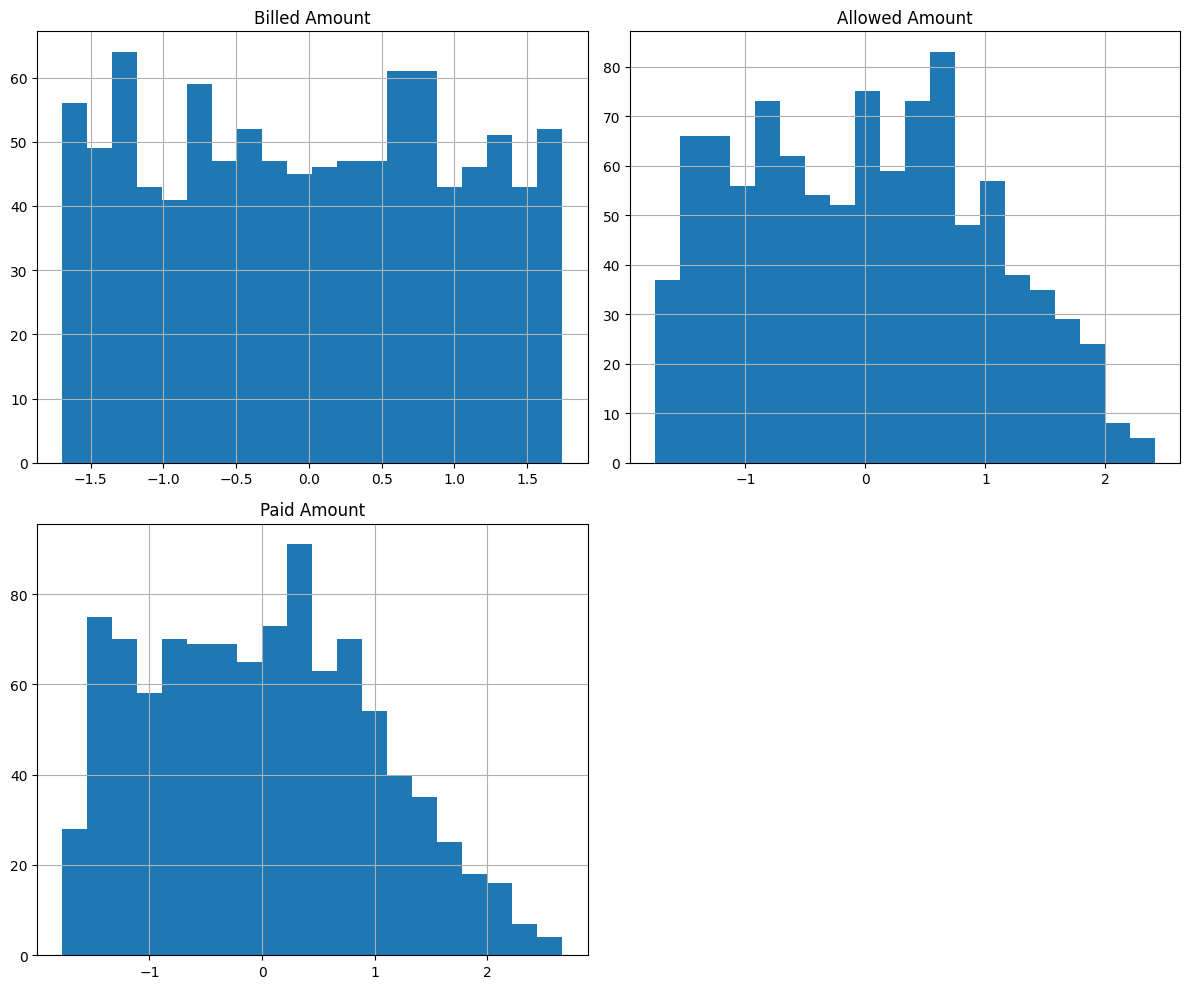


Visualizing distributions of categorical features:


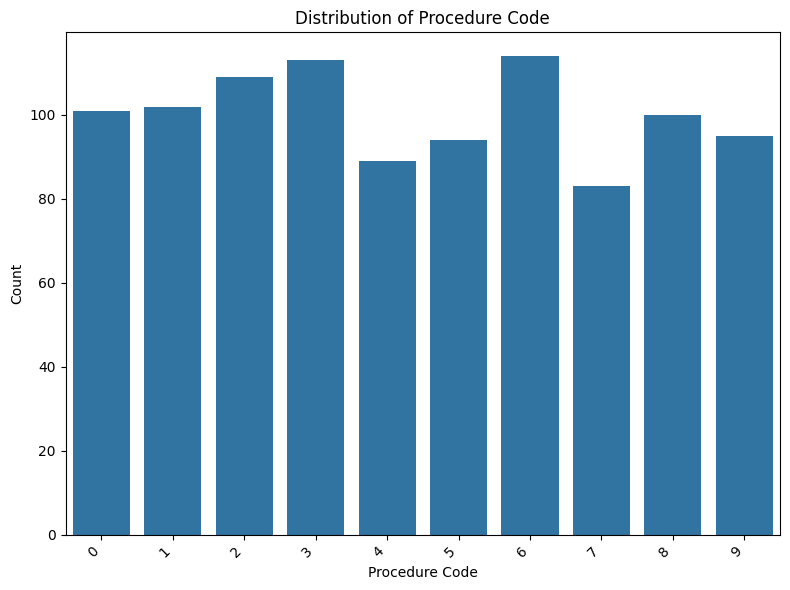

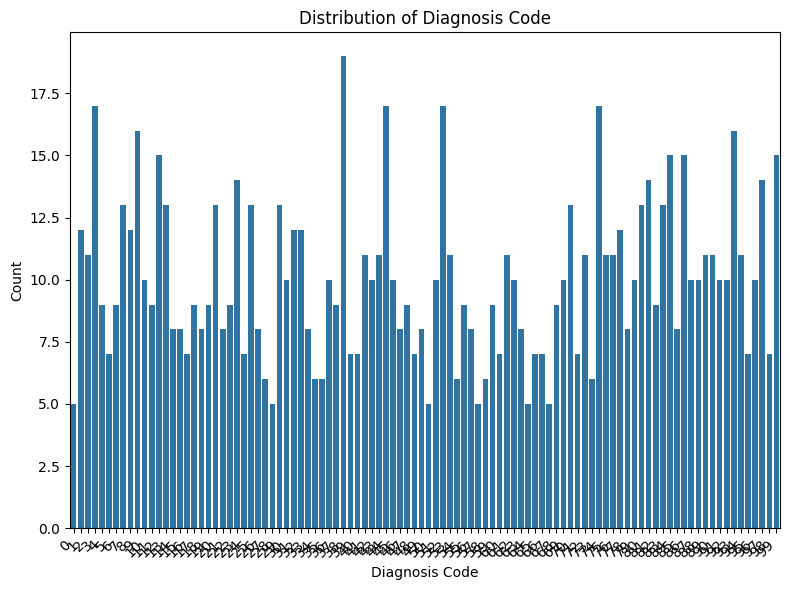

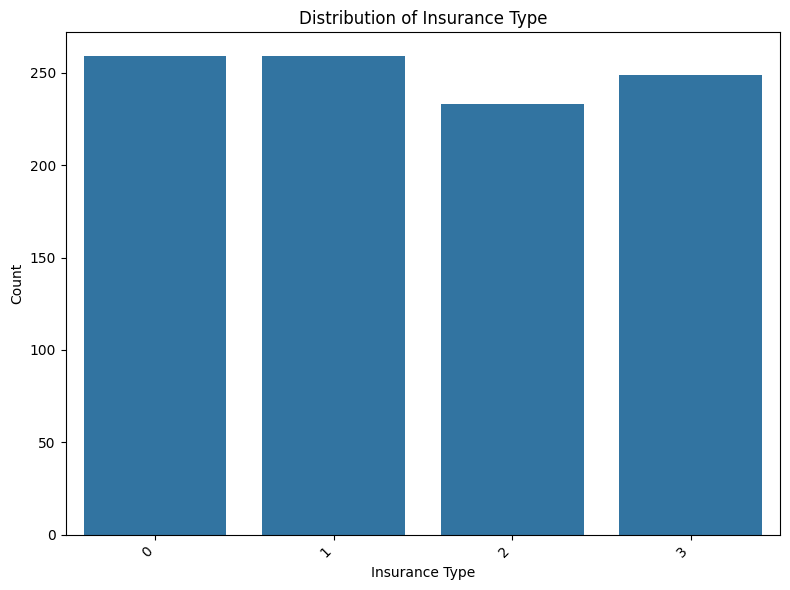

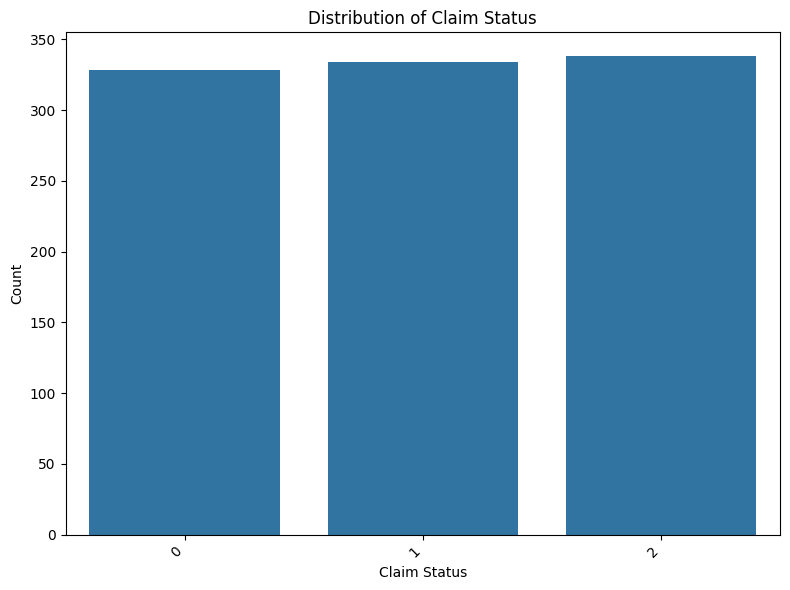

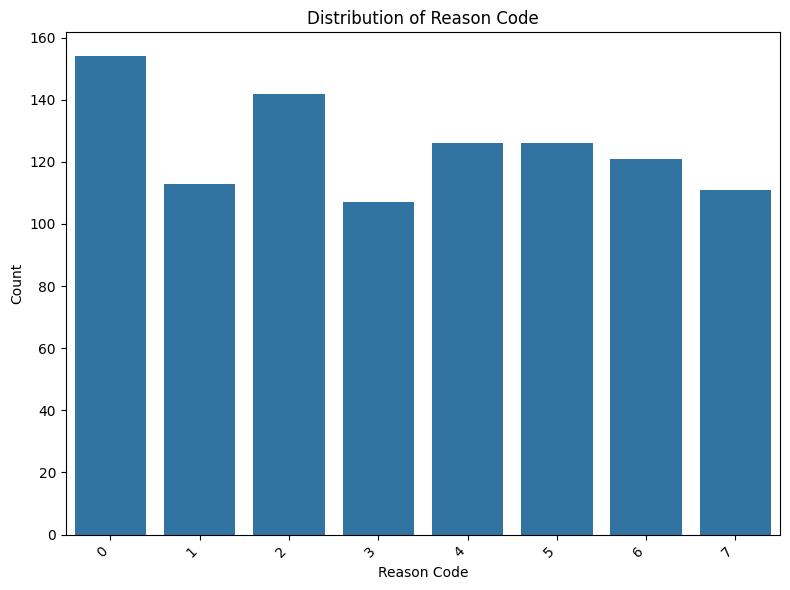

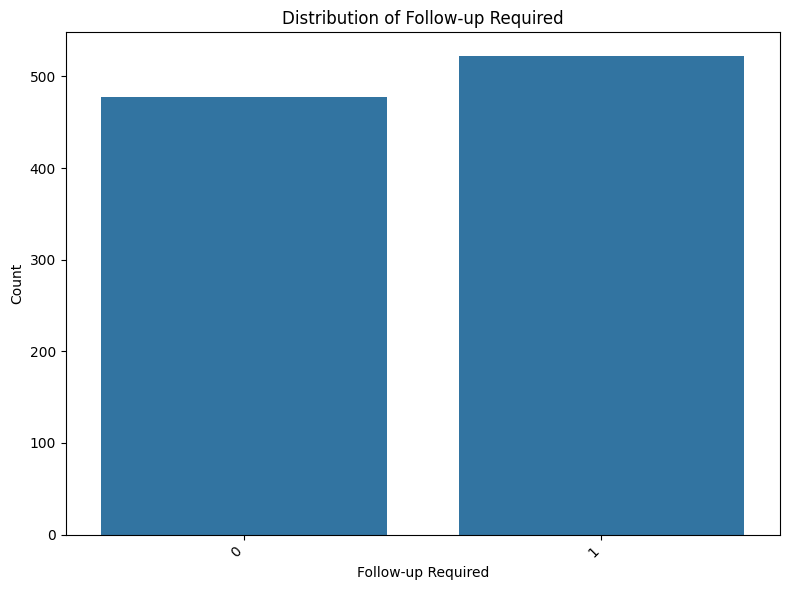

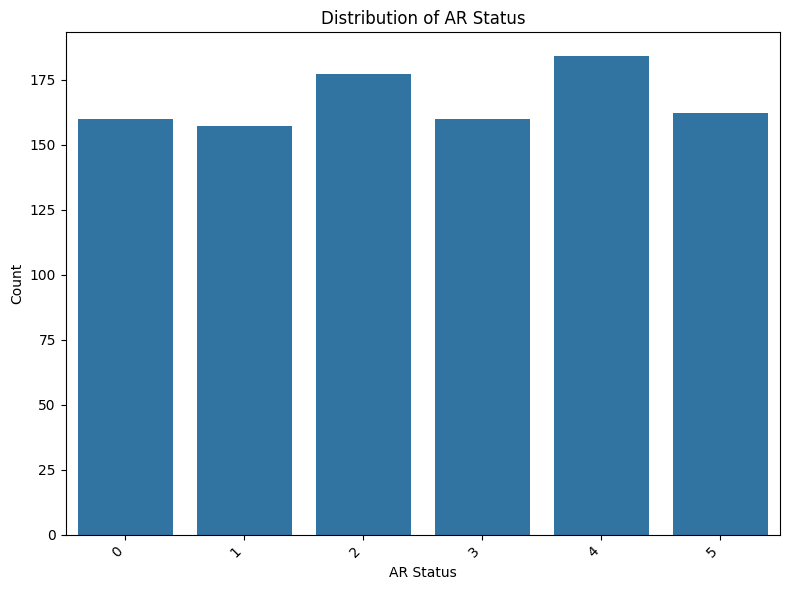

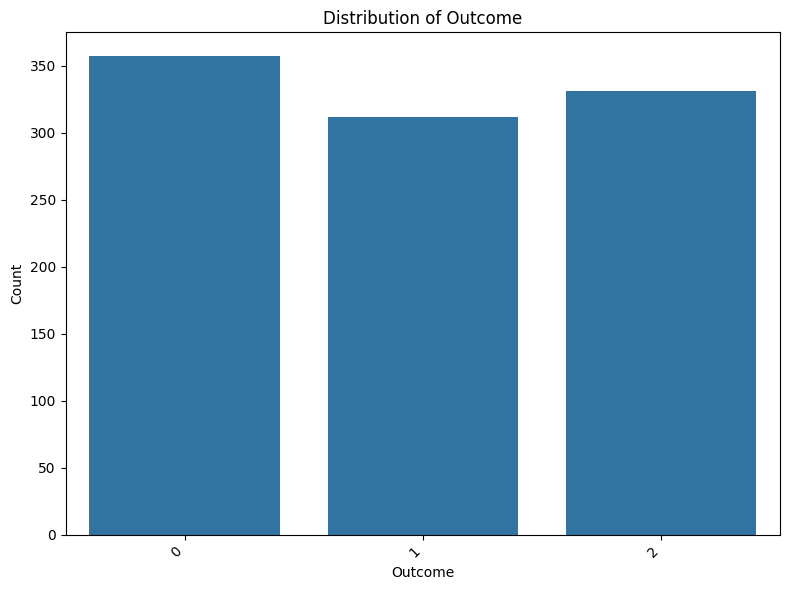

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nBasic Statistics:")
print(data.describe())

print("\nVisualizing distributions of numerical features:")
data[numerical_cols_to_scale].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

print("\nVisualizing distributions of categorical features:")
for col in categorical_cols + ['Outcome']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()




Visualizing correlations between numerical features:


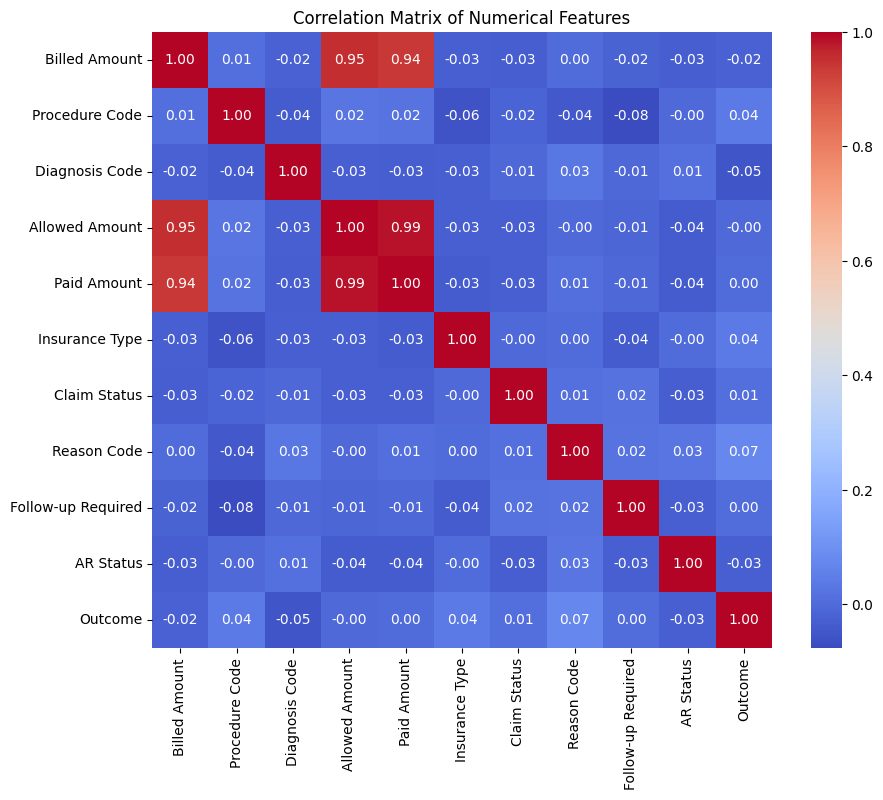

In [12]:
print("\nVisualizing correlations between numerical features:")
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Analyze relationships between features and the target variable ('Outcome')


Analyzing relationships with the target variable ('Outcome'):


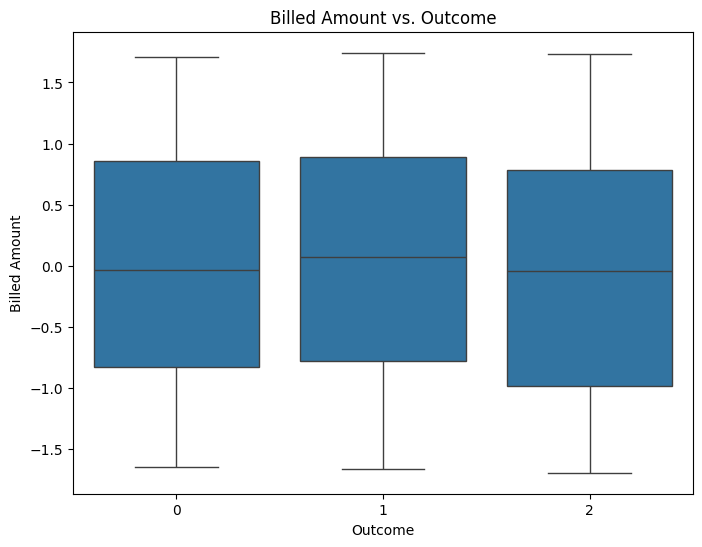

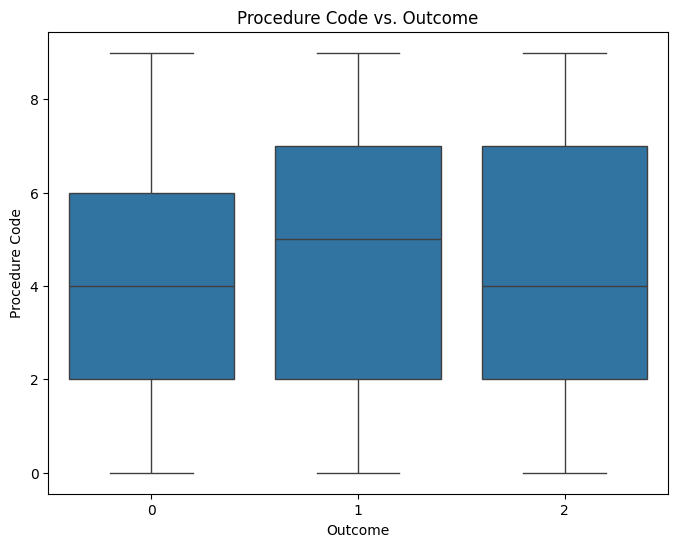

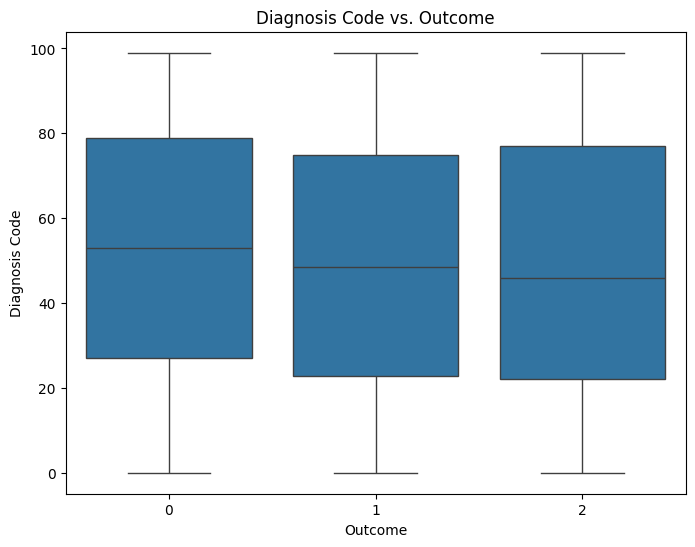

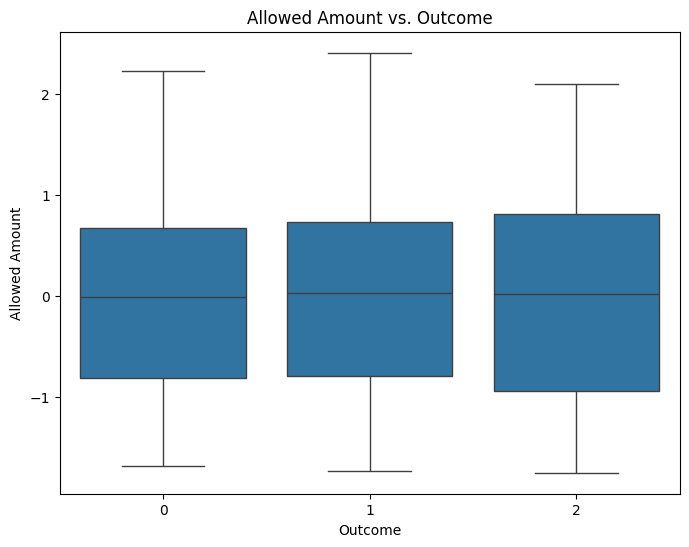

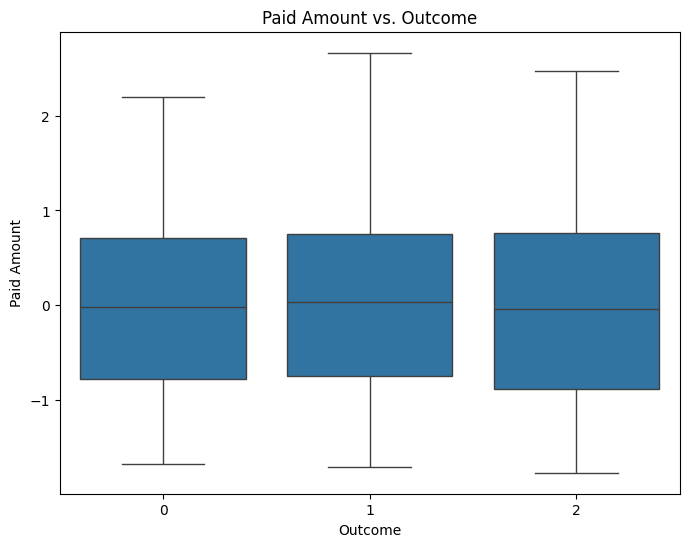

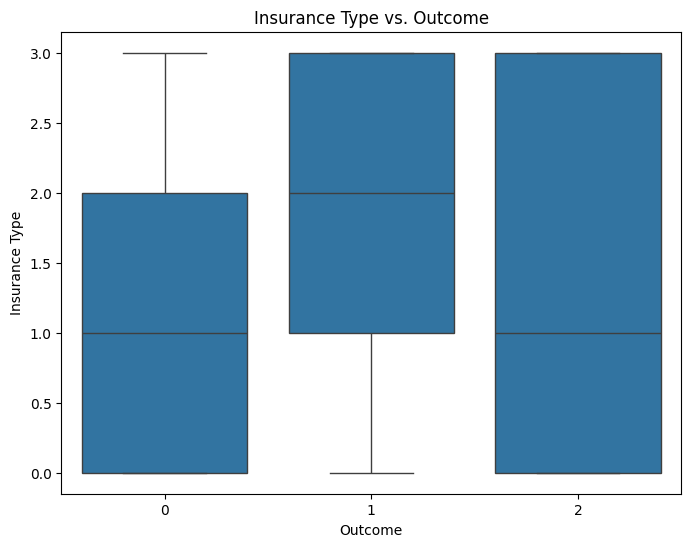

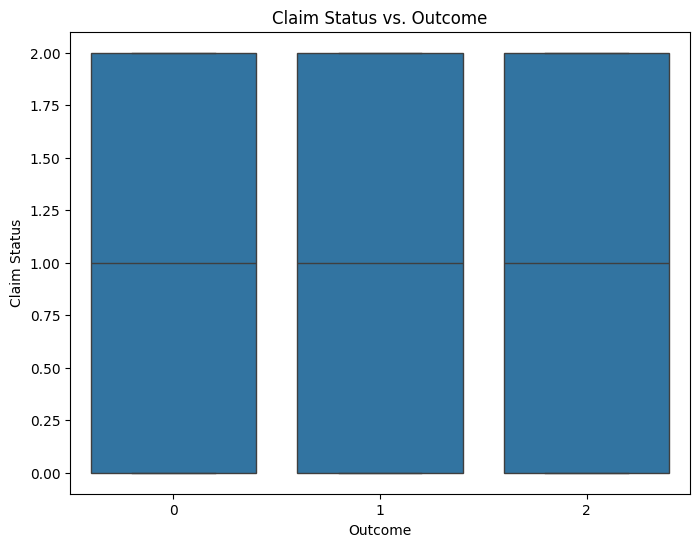

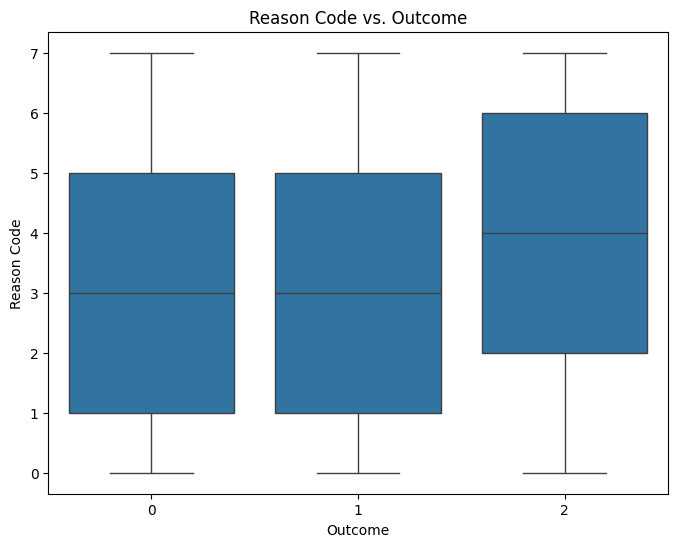

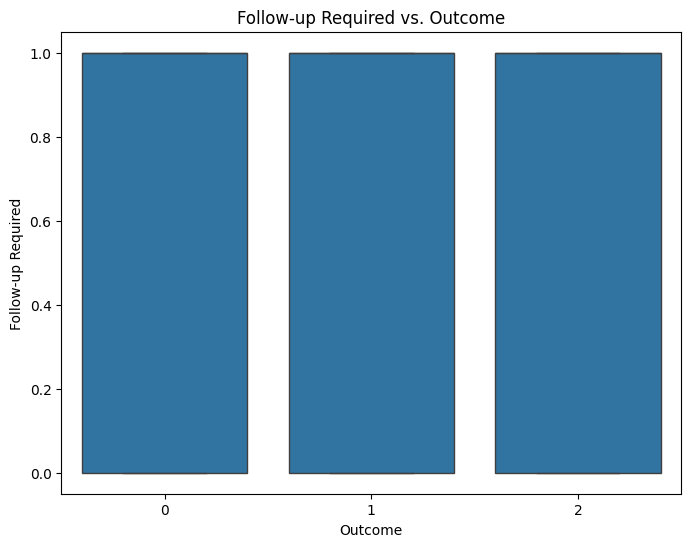

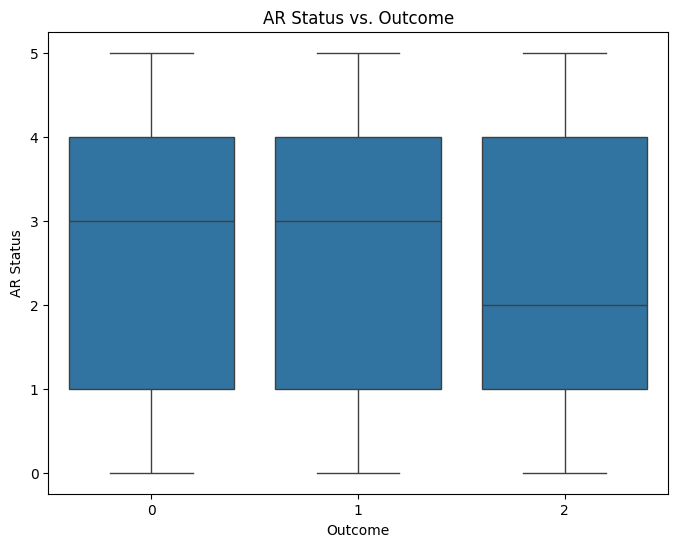

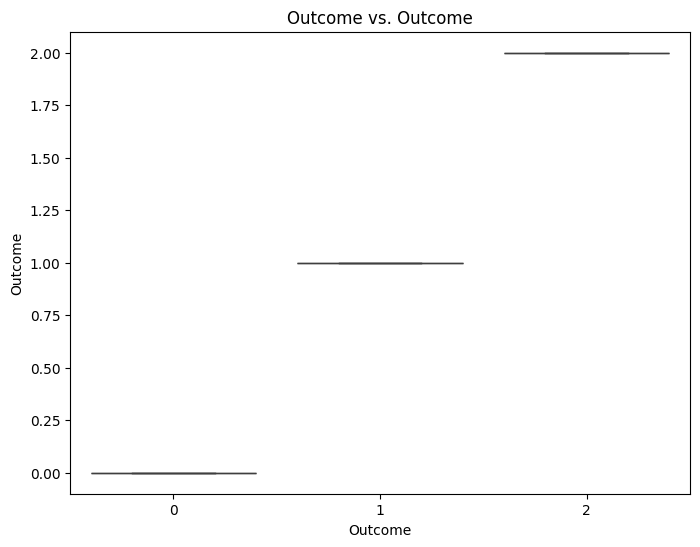

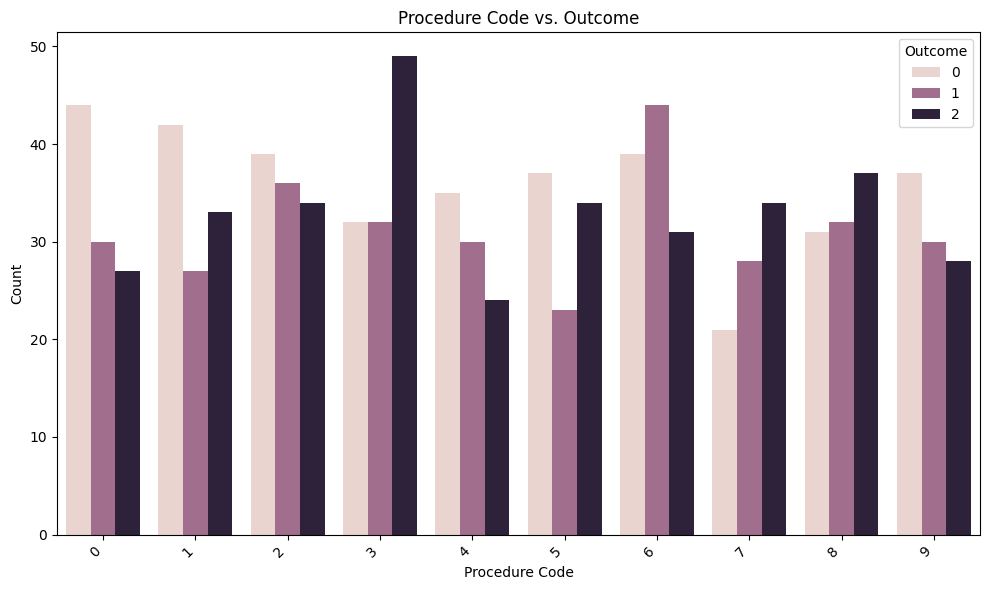

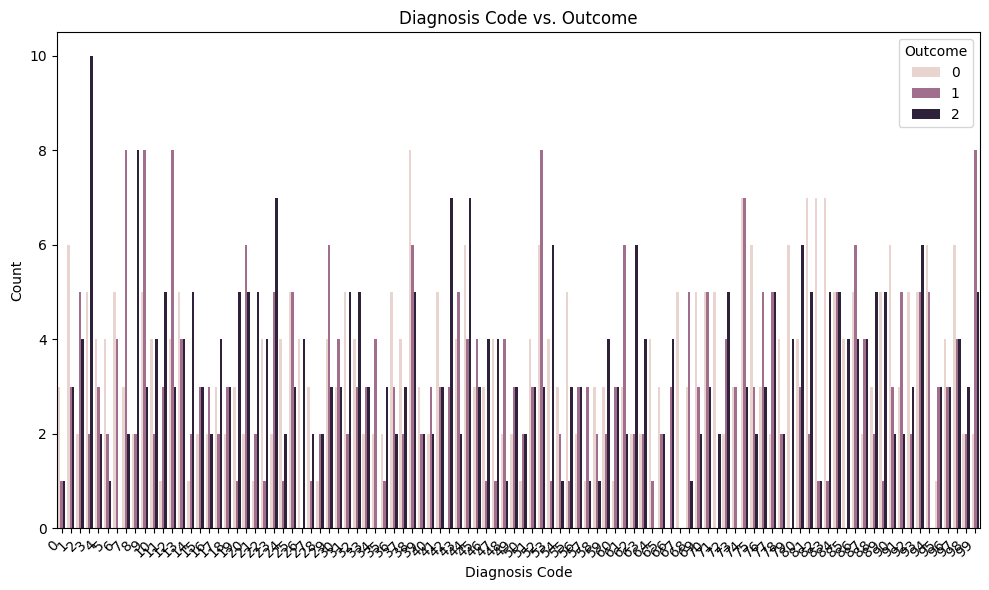

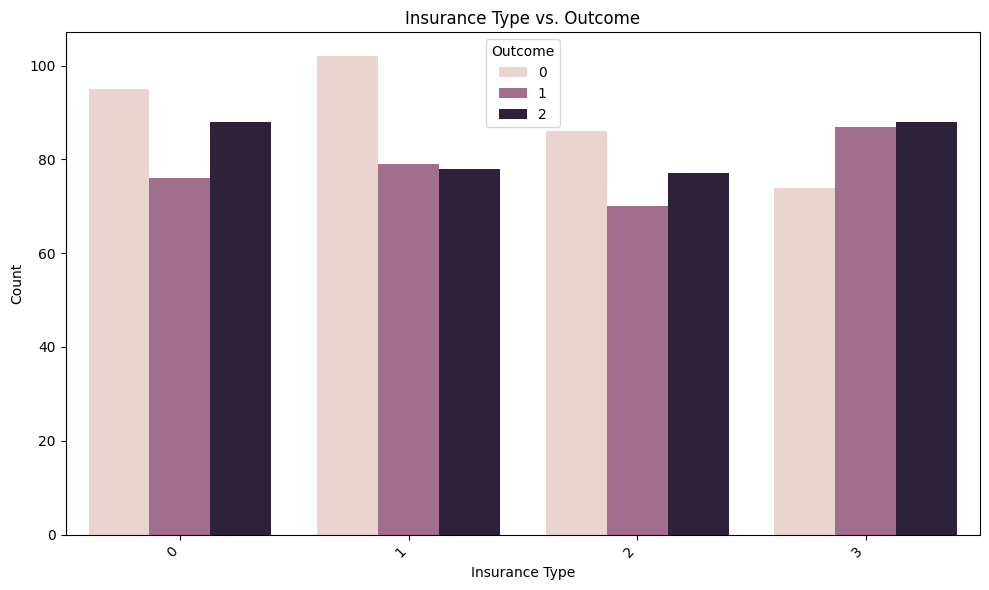

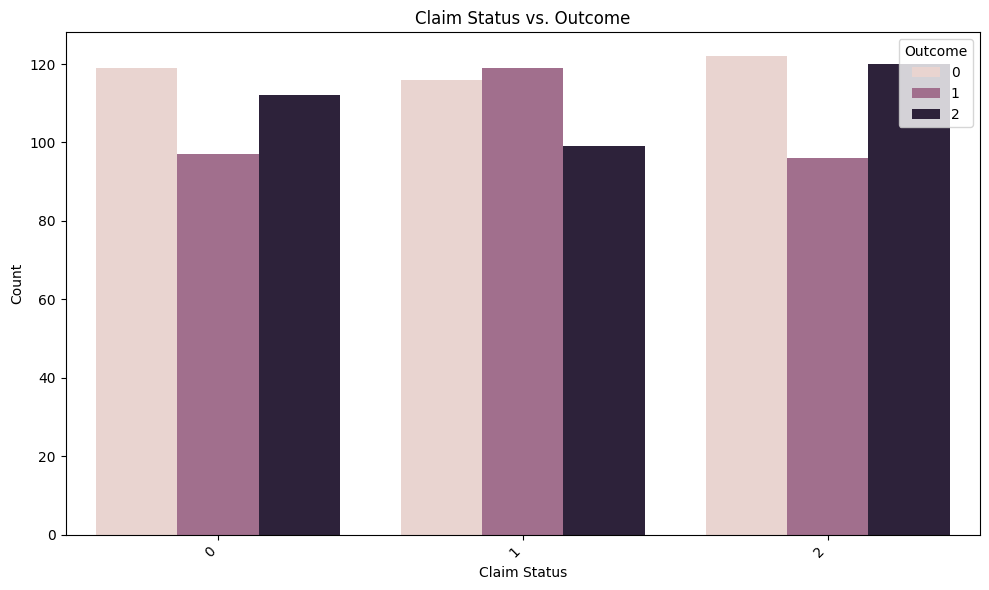

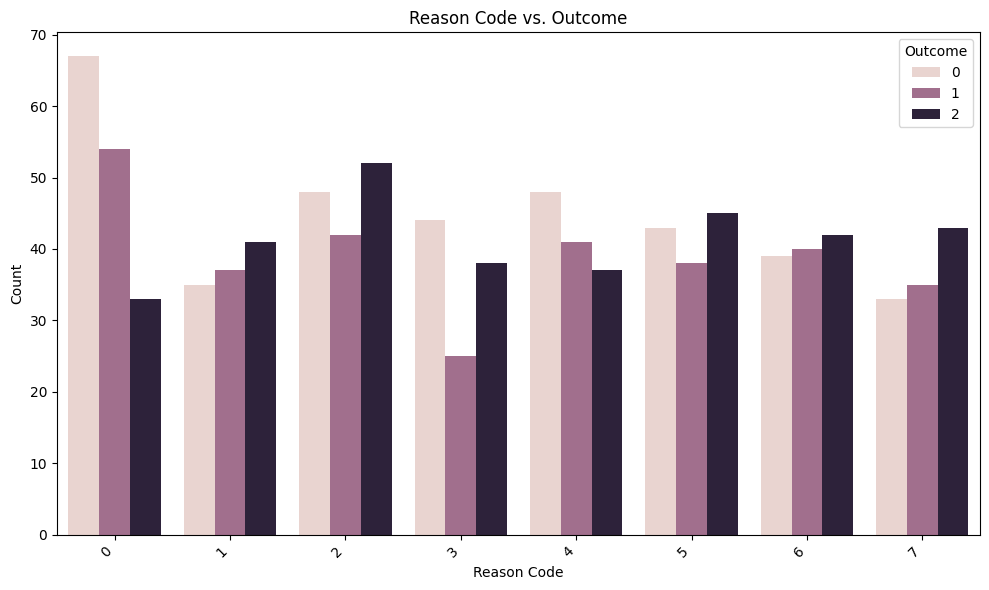

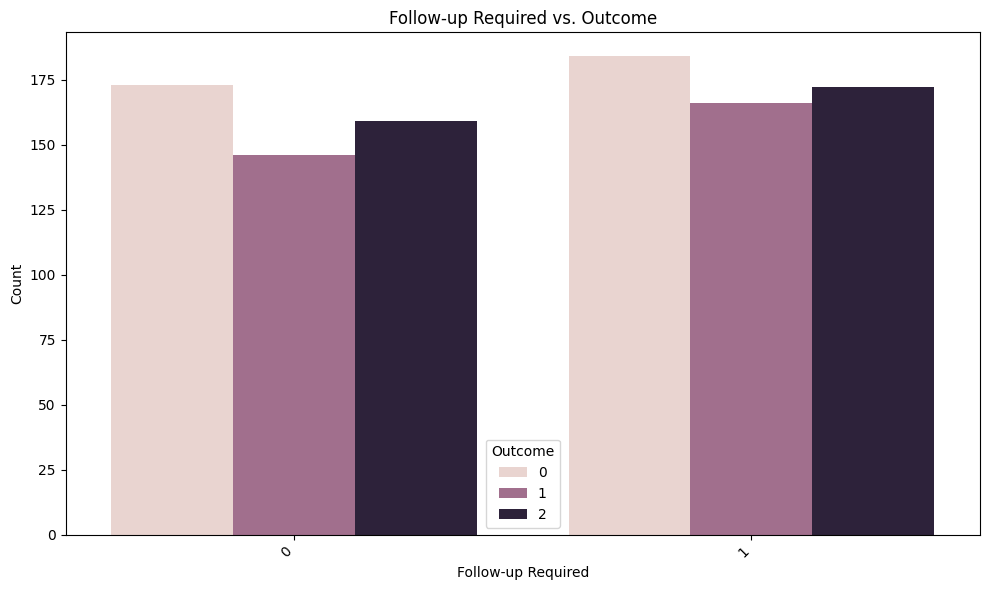

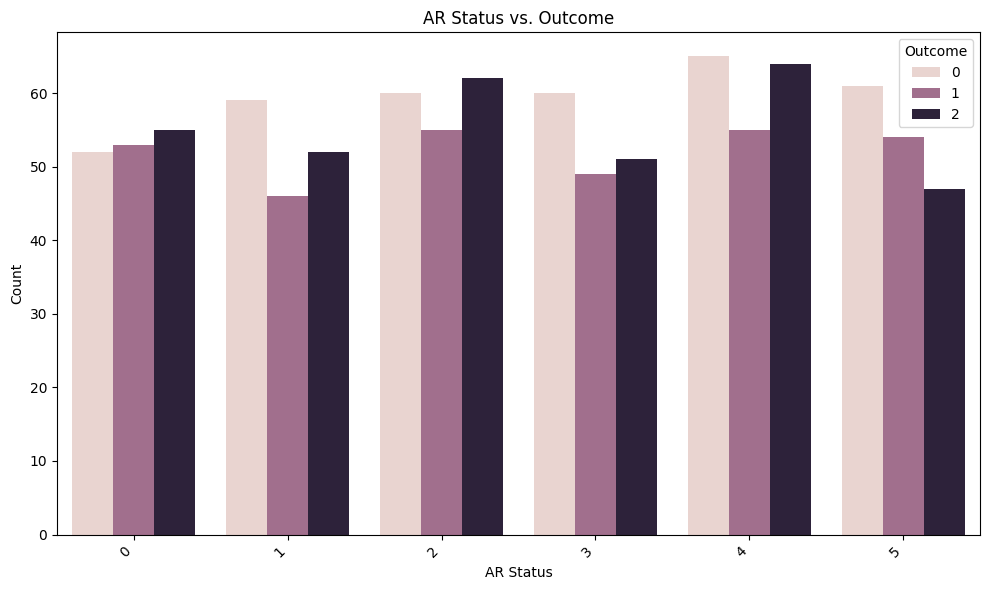

In [13]:
print("\nAnalyzing relationships with the target variable ('Outcome'):")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} vs. Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Outcome', data=data)
    plt.title(f'{col} vs. Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Outcome')
    plt.tight_layout()
    plt.show()

Distribution of Billed vs Paid Amount

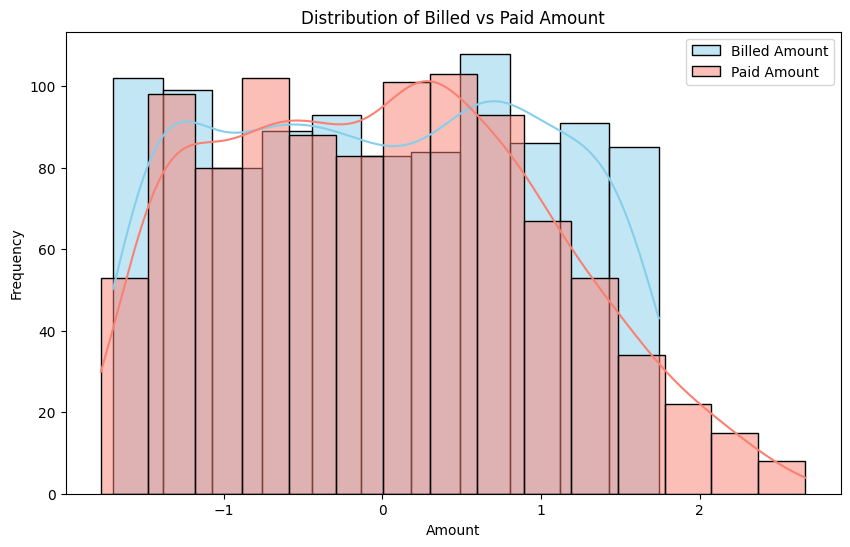

In [17]:
# Distribution of Billed vs Paid Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Billed Amount'], kde=True, color='skyblue', label='Billed Amount')
sns.histplot(data['Paid Amount'], kde=True, color='salmon', label='Paid Amount')
plt.title('Distribution of Billed vs Paid Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Outcome vs Insurance Type

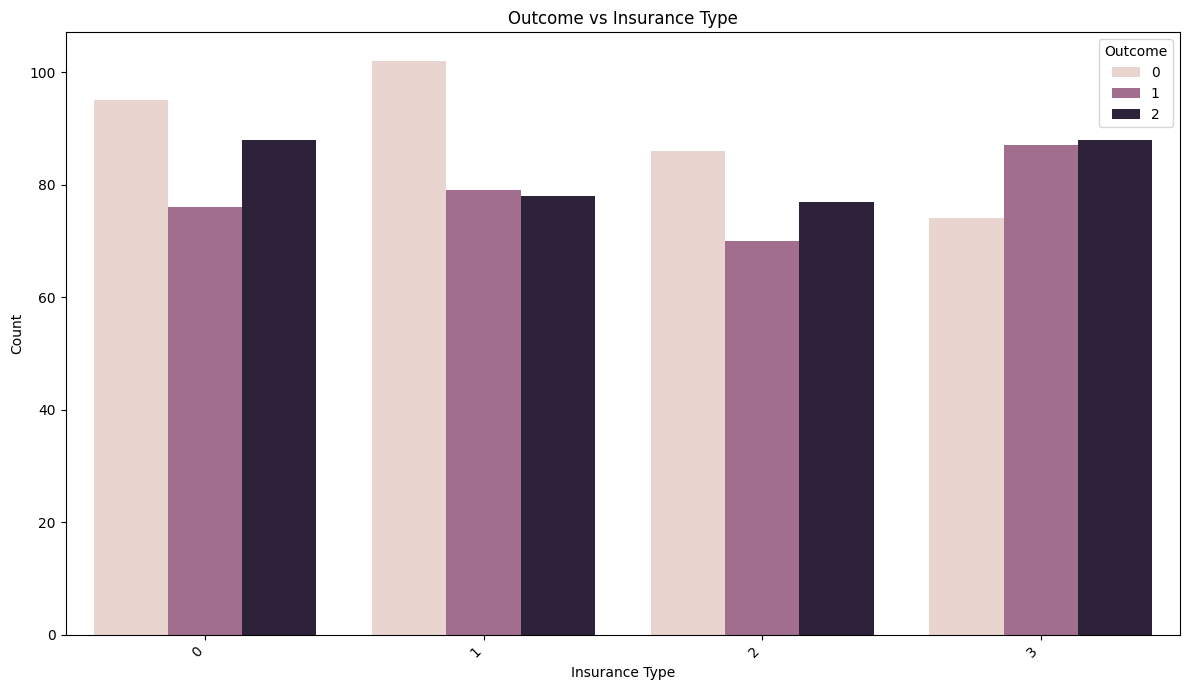

In [18]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Insurance Type', hue='Outcome', data=data)
plt.title('Outcome vs Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 Heatmap of correlations

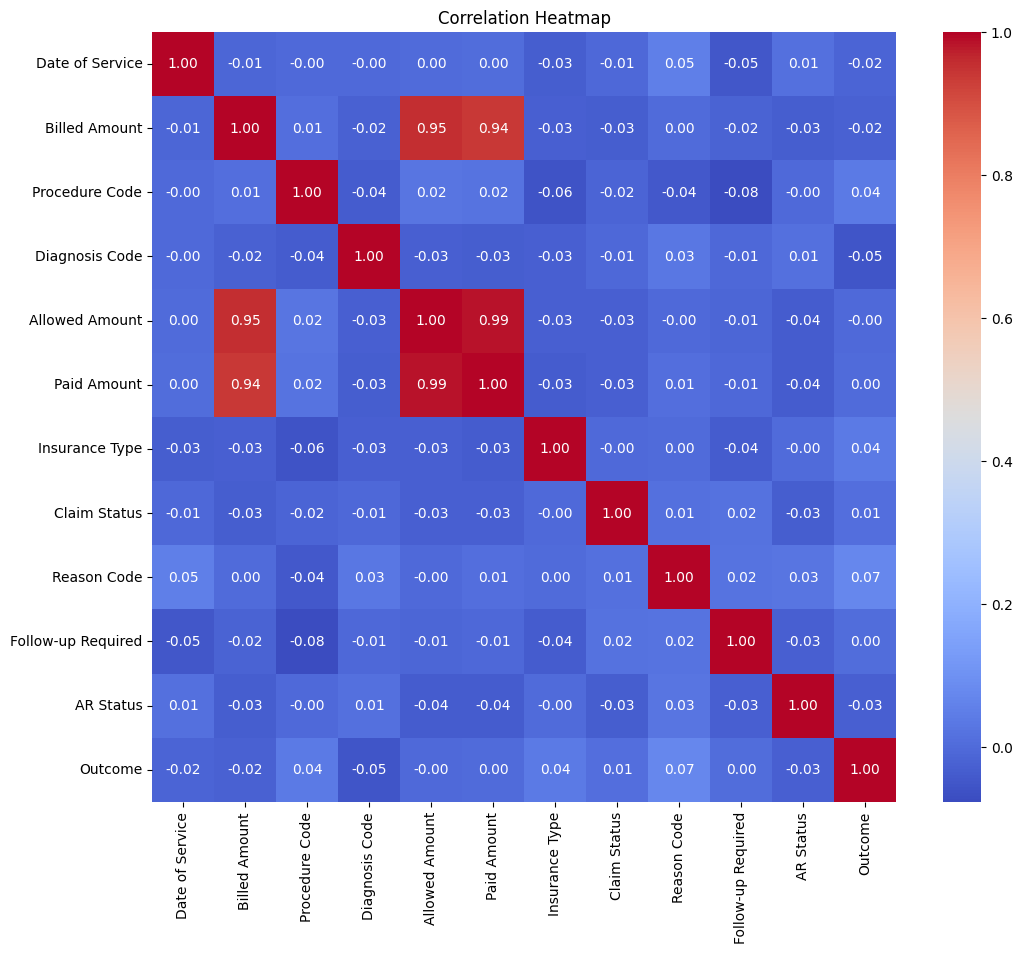

In [19]:


plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We'll treat Outcome as a multiclass classification problem (Paid = 0, Partially Paid = 1, Denied = 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


In [ ]:
X = data.drop(['Outcome', 'Date of Service'], axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Classifier Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Paid', 'Partially Paid', 'Denied']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\nAccuracy: {rf_accuracy:.4f}")
print(f"F1-score (weighted): {rf_f1:.4f}")



Training features shape: (750, 10)
Testing features shape: (250, 10)
Training labels shape: (750,)
Testing labels shape: (250,)

--- Random Forest Classifier Evaluation ---
Classification Report:
                precision    recall  f1-score   support

          Paid       0.44      0.45      0.45        89
Partially Paid       0.38      0.33      0.36        78
        Denied       0.41      0.46      0.43        83

      accuracy                           0.42       250
     macro avg       0.41      0.41      0.41       250
  weighted avg       0.41      0.42      0.41       250

Confusion Matrix:
[[40 19 30]
 [28 26 24]
 [22 23 38]]

Accuracy: 0.4160
F1-score (weighted): 0.4144


In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("\n--- Feature Importances (Random Forest) ---")
print(sorted_importances.head(10).to_markdown(numalign='left', stralign='left'))




--- Feature Importances (Random Forest) ---
|                    | 0         |
|:-------------------|:----------|
| Billed Amount      | 0.15005   |
| Allowed Amount     | 0.149961  |
| Diagnosis Code     | 0.149869  |
| Paid Amount        | 0.145219  |
| Procedure Code     | 0.0982805 |
| Reason Code        | 0.092613  |
| AR Status          | 0.076306  |
| Insurance Type     | 0.0573717 |
| Claim Status       | 0.0512612 |
| Follow-up Required | 0.0290684 |


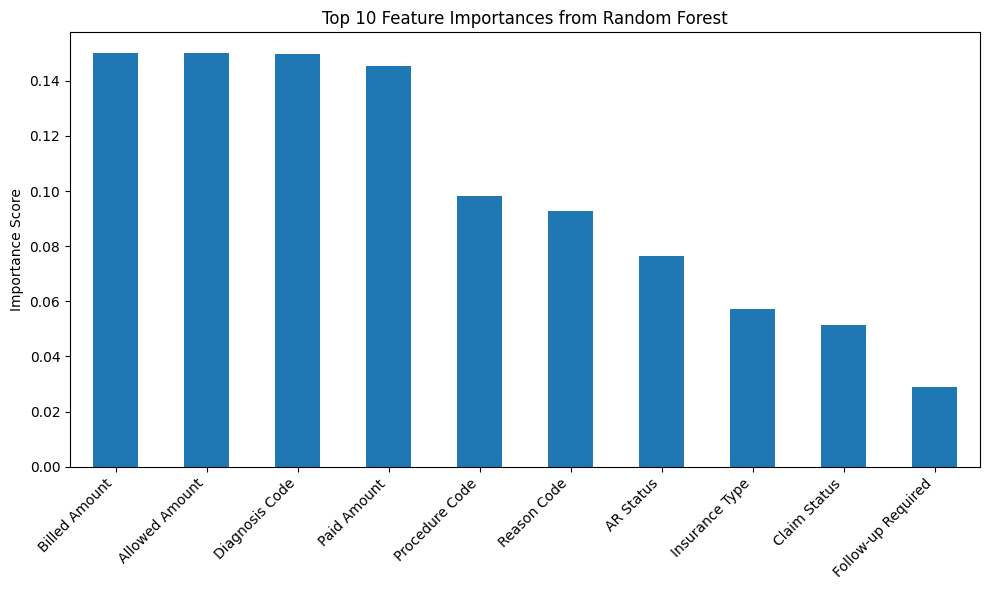


--- Logistic Regression Evaluation ---
Classification Report:
                precision    recall  f1-score   support

          Paid       0.38      0.42      0.40        89
Partially Paid       0.32      0.15      0.21        78
        Denied       0.34      0.47      0.39        83

      accuracy                           0.35       250
     macro avg       0.35      0.35      0.33       250
  weighted avg       0.35      0.35      0.34       250

Confusion Matrix:
[[37 14 38]
 [28 12 38]
 [32 12 39]]

Accuracy: 0.3520
F1-score (weighted): 0.3370


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
plt.figure(figsize=(10, 6))
sorted_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='auto', solver='liblinear', class_weight='balanced')
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


print("\n--- Logistic Regression Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Paid', 'Partially Paid', 'Denied']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\nAccuracy: {lr_accuracy:.4f}")
print(f"F1-score (weighted): {lr_f1:.4f}")


In [ ]:
# Summary of Results
print("\n--- Model Performance Summary ---")
print(f"Random Forest: Accuracy = {rf_accuracy:.4f}, F1 (weighted) = {rf_f1:.4f}")
print(f"Logistic Regression: Accuracy = {lr_accuracy:.4f}, F1 (weighted) = {lr_f1:.4f}")


--- Model Performance Summary ---
Random Forest: Accuracy = 0.4160, F1 (weighted) = 0.4144
Logistic Regression: Accuracy = 0.3520, F1 (weighted) = 0.3370
